# Step 1: Overview
The stabilityai/stable-diffusion-xl-base-1.0 model is used to generate and modify images based on text prompts. It is a Latent Diffusion Model that uses two fixed, pretrained text encoders (OpenCLIP-ViT/G and CLIP-ViT/L).

In [1]:
!pip install diffusers --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Successfully uninstalled diffusers-0.32.2


In [2]:
!pip install invisible_watermark transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

# Step 2: Loading the Model
Now that our environment is set up, let’s load the stabilityai/stable-diffusion-xl-base-1.0 model in Python. The provided code initializes the diffusion pipeline and refiner models:

# Stable Diffusion XL Base 1.0

# Model Overview:

Type: Stable Diffusion XL (SDXL) is an advanced variant of the original Stable Diffusion model.

Purpose: It is designed for generating high-quality images from textual descriptions.

Provider: Stability AI, a leading company in the development of open-source generative models.


# Training Data:

The model is trained on a diverse dataset containing a wide range of images and associated textual descriptions. This extensive training enables it to understand and generate a broad spectrum of visual content.

In [3]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Initialisation du modèle
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

# Interface utilisateur
prompt_input = widgets.Textarea(value="A cute cat wearing sunglasses", description="Prompt:")
generate_btn = widgets.Button(description="Generate Image")
output = widgets.Output()

def on_generate_click(b):
    with output:
        output.clear_output()
        print("Generating... (this may take 1-2 minutes)")

        # Génération de l'image
        image = pipe(
            prompt=prompt_input.value,
            height=768,
            width=768,
            num_inference_steps=30
        ).images[0]

        # Affichage
        display(image)
        image.save("generated_image.png")
        print("✓ Image saved as 'generated_image.png'")

generate_btn.on_click(on_generate_click)

# Affichage de l'interface
display(widgets.VBox([prompt_input, generate_btn, output]))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# Sample text input
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."

In [5]:
# Negative prompt (optional)
negative_prompt = "Avoid including any water elements in the scene."


In [6]:
# Generate image from text
images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

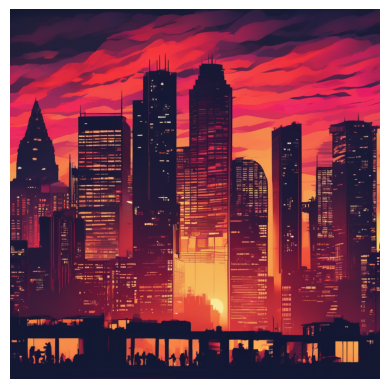

In [7]:
import matplotlib.pyplot as plt

# Display the image using matplotlib
plt.imshow(images)
plt.axis('off')
plt.show()

# Proper APP

  0%|          | 0/50 [00:00<?, ?it/s]

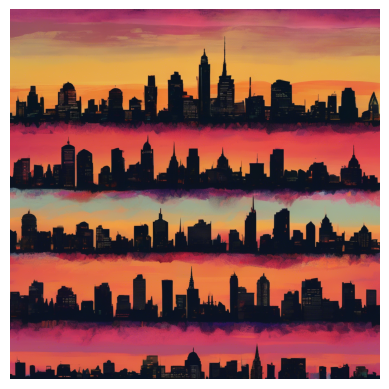

In [8]:
def generate_image(prompt, negative_prompt):
    # Generate image using the base pipeline
    images = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

    # Display the image using matplotlib
    plt.imshow(images)
    plt.axis('off')
    plt.show()

# Example usage
prompt = "A vibrant sunset over the city skyline with silhouetted buildings."
negative_prompt = "Avoid including any water elements in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

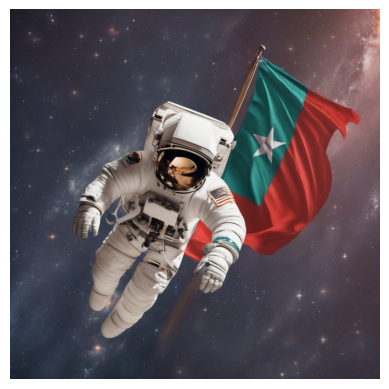

In [13]:
# Example usage
prompt = "A spaceman floating in the galaxy with  moroccan flag no usa flag."
negative_prompt = "Avoid including any alien creatures in the scene."
generate_image(prompt, negative_prompt)

  0%|          | 0/50 [00:00<?, ?it/s]

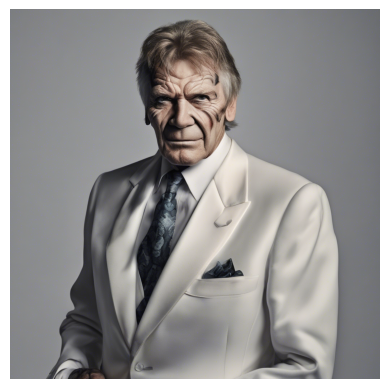

In [11]:
# Example usage
prompt = "A portrait of the Iron Maiden singer in a formal suit."
negative_prompt = "Avoid including any other people in the scene."
generate_image(prompt, negative_prompt)